In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score, f1_score

In [ ]:
data = pd.read_csv('fraudTest.csv')

In [ ]:
print(data.head())

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union  ...  40.3207 

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7798 entries, 0 to 7797
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             7798 non-null   int64  
 1   trans_date_trans_time  7798 non-null   object 
 2   cc_num                 7798 non-null   int64  
 3   merchant               7798 non-null   object 
 4   category               7798 non-null   object 
 5   amt                    7798 non-null   float64
 6   first                  7798 non-null   object 
 7   last                   7798 non-null   object 
 8   gender                 7798 non-null   object 
 9   street                 7798 non-null   object 
 10  city                   7798 non-null   object 
 11  state                  7798 non-null   object 
 12  zip                    7798 non-null   int64  
 13  lat                    7798 non-null   float64
 14  long                   7798 non-null   float64
 15  city

In [ ]:
print(data.describe())

        Unnamed: 0        cc_num          amt           zip          lat  \
count  7798.000000  7.798000e+03  7798.000000   7798.000000  7798.000000   
mean   3898.500000  4.045046e+17    68.658160  48467.937548    38.486395   
std    2251.233033  1.293290e+18   122.077687  26765.475620     5.088719   
min       0.000000  6.041621e+10     1.000000   1257.000000    20.027100   
25%    1949.250000  1.800462e+14     9.450000  26237.000000    34.509100   
50%    3898.500000  3.518235e+15    46.345000  47987.000000    39.342600   
75%    5847.750000  4.642255e+15    81.600000  72011.000000    42.015800   
max    7797.000000  4.992346e+18  3204.980000  99783.000000    65.689900   

              long      city_pop     unix_time    merch_lat   merch_long  \
count  7798.000000  7.798000e+03  7.797000e+03  7797.000000  7797.000000   
mean    -89.976821  9.835233e+04  1.371903e+09    38.467741   -89.975801   
std      13.600215  3.330378e+05  4.968043e+04     5.124246    13.621047   
min    -165

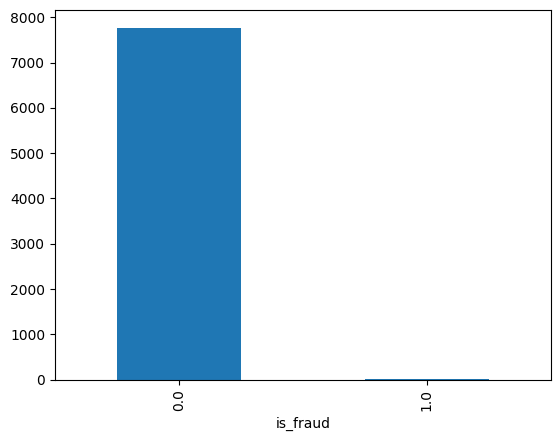

In [ ]:
data.groupby("is_fraud")['cc_num'].count().plot(kind="bar")
plt.show()

In [ ]:
useless_cols = [
    'Unnamed: 0', 'merchant', 'cc_num', 'first', 'zip', 'last', 'trans_num',
    'unix_time', 'street', 'merch_lat', 'gender', 'merch_long', 'job', 'trans_date_trans_time'
]
data.drop(columns=useless_cols, inplace=True)

In [ ]:
data["dob"] = pd.to_datetime(data["dob"])
data["dob"] = data["dob"].dt.year
data['dob'] = datetime.now().year - data['dob']
data = data.rename(columns={"dob": "age"})

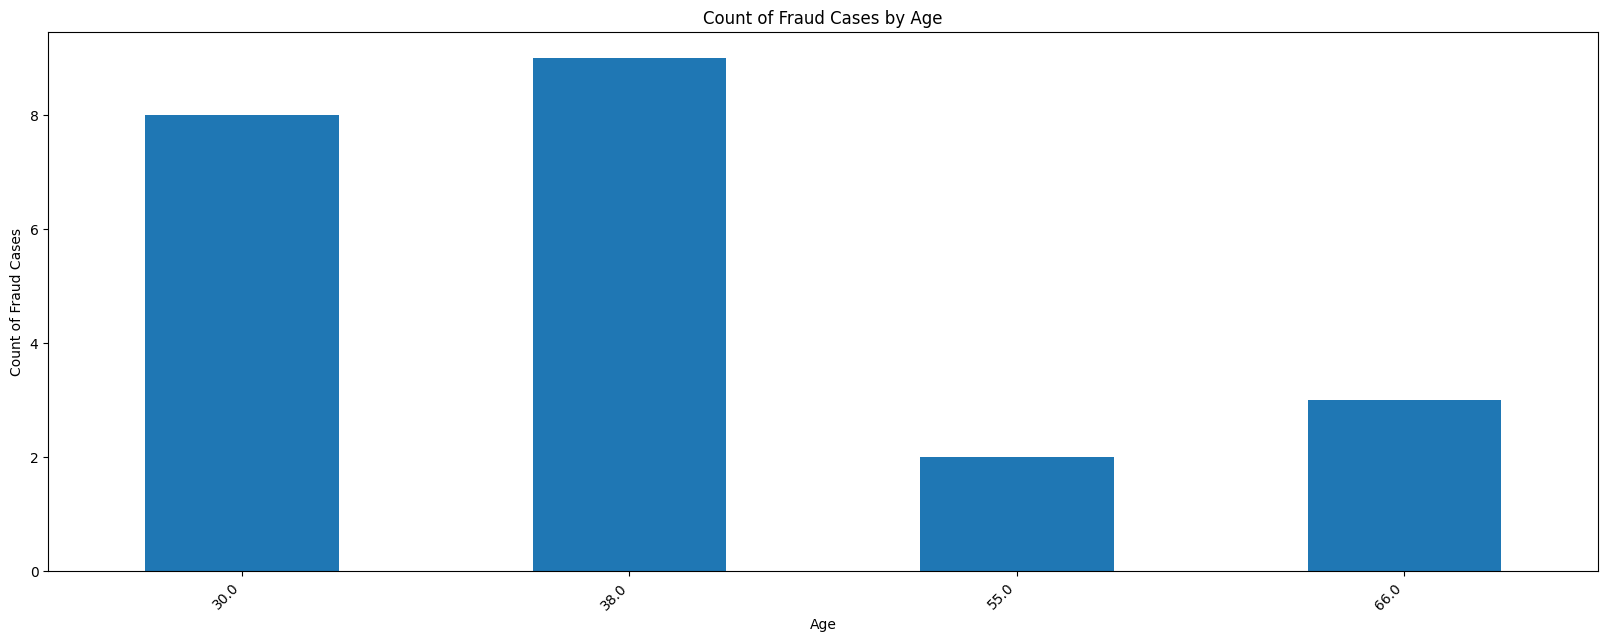

In [ ]:
plt.figure(figsize=(20, 7))
ax = data[data['is_fraud'] == 1].groupby('age').count()['is_fraud'].plot(kind='bar')
ax.set_xlabel('Age')
ax.set_ylabel('Count of Fraud Cases')
ax.set_title('Count of Fraud Cases by Age')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
numeric_columns = [i for i in data.columns if data[i].dtype in ['int64', 'int32', 'float64']]
categorical_columns = [i for i in data.columns if data[i].dtype == 'object']
print(numeric_columns)
print(categorical_columns)

['amt', 'lat', 'long', 'city_pop', 'age', 'is_fraud']
['category', 'city', 'state']


In [ ]:
encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])

In [ ]:
columns = data.columns.tolist()
columns.remove('is_fraud')
X = data.drop(['is_fraud'], axis=1)
y = data['is_fraud']

In [ ]:
y = y.fillna(y.mode()[0])

In [ ]:
X = X.fillna(X.mean())

In [ ]:
scaler = StandardScaler()
X[columns] = scaler.fit_transform(X[columns])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    return accuracy, precision, recall, f1, roc_auc

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: Logistic Regression
Accuracy: 0.9968
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC AUC Score: 0.9832




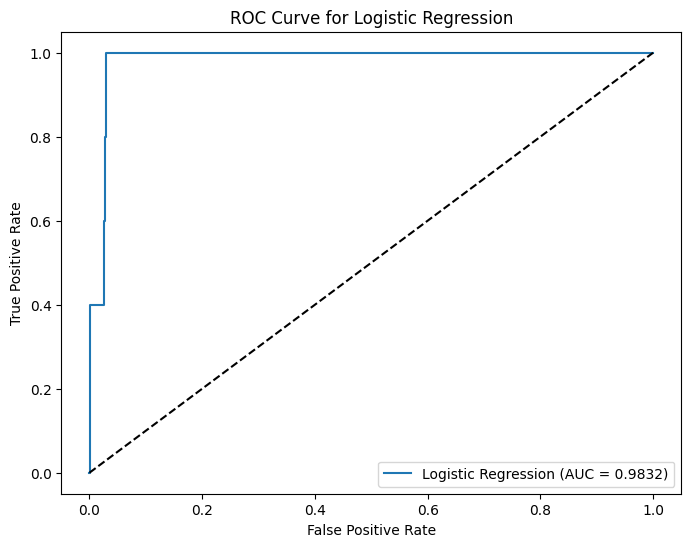

Model: Decision Tree
Accuracy: 0.9987
Precision: 0.8000
Recall: 0.8000
F1 Score: 0.8000
ROC AUC Score: 0.8997




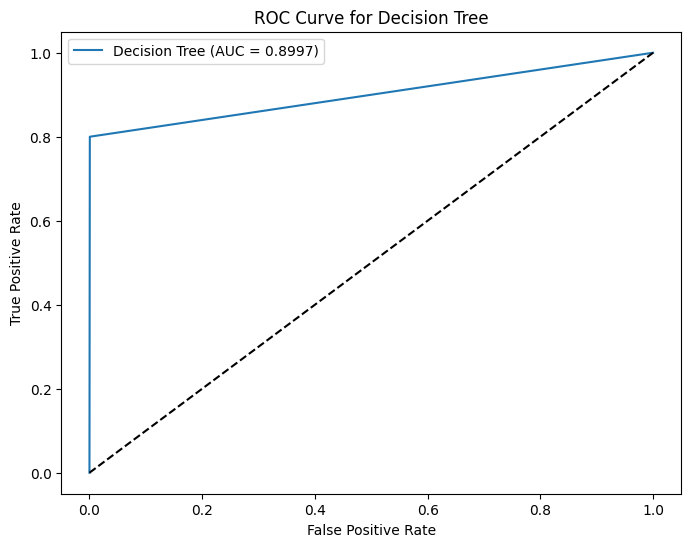

Model: Random Forest
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC Score: 1.0000




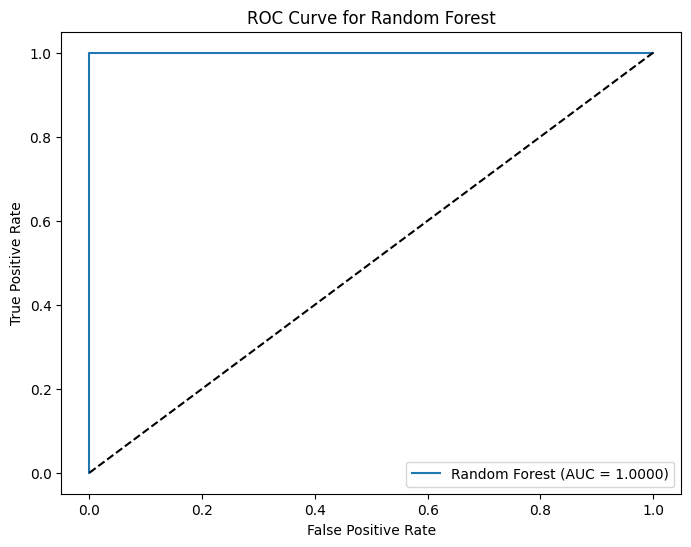

In [ ]:
for model_name, model in models.items():
    accuracy, precision, recall, f1, roc_auc = evaluate_model(model, X_train, y_train, X_test, y_test)
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print("\n")

    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.4f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend()
    plt.show()